In [91]:
# Bibliotecas

# Manipulação de dados
import pandas as pd
import numpy as np

# Gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# SkLearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Configurações de plot
plt.style.use('ggplot')

In [16]:
df = pd.read_csv('College_Data')
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [19]:
# Nulos
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [20]:
# Estatistica Descritiva
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


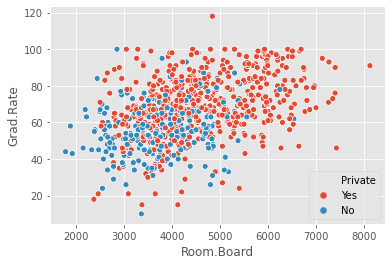

In [23]:
# Verificando algumas relações
sns.scatterplot('Room.Board', 'Grad.Rate', data=df, hue='Private')

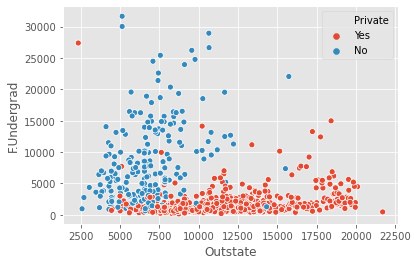

In [30]:
# Verificando algumas relações
sns.scatterplot('Outstate','F.Undergrad', data=df, hue='Private')

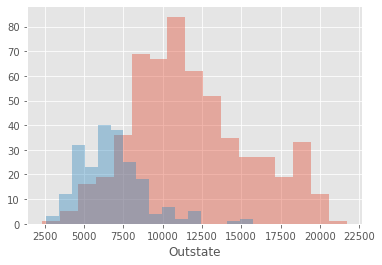

In [43]:
# Verificando histogramas comparando classes 
sns.distplot(df['Outstate'][df['Private']=='Yes'],kde=False)
sns.distplot(df['Outstate'][df['Private']=='No'],kde=False)

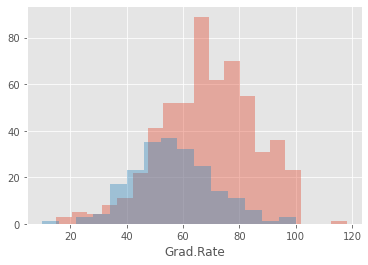

In [44]:
# Verificando histogramas comparando classes 
sns.distplot(df['Grad.Rate'][df['Private']=='Yes'],kde=False)
sns.distplot(df['Grad.Rate'][df['Private']=='No'],kde=False)

In [54]:
# Existe escola com taxa de graduação acima de 100%?
df[df['Grad.Rate']>100]['Grad.Rate']

95    118
Name: Grad.Rate, dtype: int64

In [57]:
# Trocar valor para 100
df.loc[95,'Grad.Rate'] = 100

In [59]:
# Verificar se trocou
df[df['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


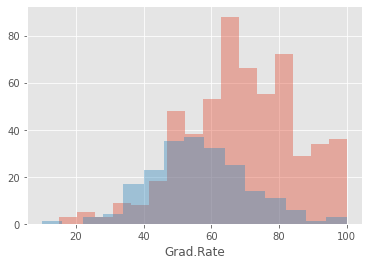

In [60]:
# Alterou histograma?
sns.distplot(df['Grad.Rate'][df['Private']=='Yes'],kde=False)
sns.distplot(df['Grad.Rate'][df['Private']=='No'],kde=False)

In [70]:
# Associando X e y
y = df['Private']
X = df.drop(['Unnamed: 0','Private'], axis = 1)

In [76]:

kmeans = KMeans(2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [79]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0
    
df['Cluster'] = df['Private'].apply(converter)

In [87]:
confusion_matrix(df['Cluster'], y_pred)

array([[ 74, 138],
       [ 34, 531]], dtype=int64)

In [90]:
print(classification_report(df['Cluster'], y_pred))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [94]:
# Acurácia do nossos segmentador
# Uma acurácia de quase 77% mesmo sem usar as labels, podemos considerar aproveitavel
accuracy_score(df['Cluster'], y_pred)

0.7786357786357786